# Analysis of Hits Present in Single Beams

There were a large number of hits that were only detected in one of the beams. These could potentially be some of the most interesting hits, but there are far too many of them to be able to look at all of the waterfall plots because there are nearly 250,000 of these hits. So I need to put together a way to more quickly filter all of these out to see what might be interesting. Some of the ways that I might do this is by looking at the Signal to Noise Ratio, examining if any of these hits were at sources that were observed multiple times, looking at the distribution of the beams where these hits were detected, and setting a threshhold on the drift rates. These could also change or have ideas added to them as I go to try to find a shortlist of some interesting hits.

But to start, I need to load in the packages that I will need for this notebook. As with all of the other notebooks, the versions of each package will be listed in the README.md.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from tabulate import tabulate
from astropy.time import Time
from tqdm import tqdm

In [8]:
with open('../../Pickle_Files/snr_filtered.pkl', 'rb') as f:

    snr_data = pickle.load(f) # deserialize using load()
    
print(snr_data.shape)

(772551, 24)


In [3]:
file_path = snr_data['file_path']
sourceName = snr_data['sourceName']

subset = snr_data.loc[snr_data['sourceName'] == np.unique(sourceName)[8]]

display(subset.sort_values(by = ["signal_frequency"])[72:80])
comparison = subset.sort_values(by = ["signal_frequency"])[72:80]
frequency_difference = (np.array(comparison["signal_frequency"])[5]-np.array(comparison["signal_frequency"])[2])*1e6
time_difference = (np.array(comparison["tstart"])[5]-np.array(comparison["tstart"])[2])*24*60*60
print(frequency_difference/time_difference)

,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
147581,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,314.0,2764.711700,93284.0,0.0,0.0,10.392298,31.0,64.0,2.559844e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,31.0,93244.0,2.0
147585,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,323.0,2764.791527,103747.0,0.0,0.0,8.178351,31.0,64.0,2.187121e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,31.0,103707.0,2.0
147586,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,320.0,2764.849693,111371.0,0.0,0.0,8.094995,31.0,64.0,2.173088e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,31.0,111331.0,2.0
219044,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,35.0,2797.093193,12215.0,0.0,0.0,8.620512,0.0,64.0,2.251797e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,0.0,12175.0,3.0
219047,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,47.0,2797.274887,36030.0,0.0,0.0,9.941420,0.0,64.0,2.473173e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,0.0,35990.0,3.0
219051,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,49.0,2797.287079,37628.0,0.0,0.0,9.142441,0.0,64.0,2.339269e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,0.0,37588.0,3.0
148538,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,271.0,2828.890457,116714.0,0.0,0.0,8.014597,31.0,64.0,1.964519e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,31.0,116674.0,2.0
219521,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,20.0,2861.053108,6961.0,0.0,0.0,8.114970,0.0,64.0,2.016678e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,0.0,6921.0,3.0


109084.62007378394


(108, 24)
1721


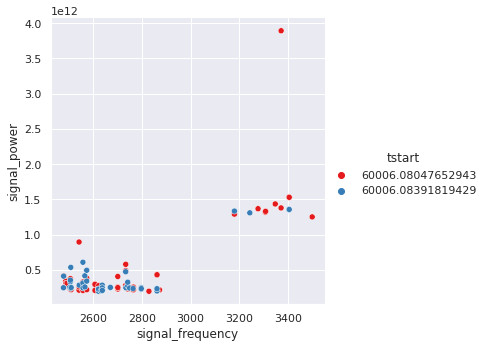

In [4]:
print(subset.shape)
print(len(np.unique(snr_data['tstart'])))

sns.set_theme()
#sns.relplot(data=snr_data, x=snr_data['signal_frequency'], y=snr_data['signal_power'], hue=snr_data['tstart'])
sns.relplot(data=subset, x=subset['signal_frequency'], y=subset['signal_power'], hue=subset['tstart'], palette = 'Set1')
#sns.relplot(data=subset2, x=subset2['signal_frequency'], y=subset2['signal_power'], hue=subset2['tstart'], palette = 'Set1')
#plt.xlim(2470, 2580)

In [5]:
file_path = snr_data["file_path"]
unique_file_path = np.unique(file_path) #the array of unique fields of view
print(len(unique_file_path))
print(len(np.unique(snr_data["tstart"])))

time = snr_data["tstart"]
time_stamp = np.unique(time)

20326
1721


In [ ]:
source_name = np.unique(snr_data["sourceName"])
source = snr_data["sourceName"]

#times_per_source = []
unique_times_per_source = []
for i in tqdm(range(len(source_name))):
    source_subset = snr_data.loc[snr_data['sourceName'] == source_name[i]] #select each subset
    
    time = source_subset["tstart"] #define just the column for the start times
    time_stamp = np.unique(time)
    
    times_per_source = []
    
    for k in range(len(time_stamp)):
        times_per_source.append(np.count_nonzero(time == time_stamp[k]))
    unique_times_per_source.append(len(times_per_source))

In [ ]:
print(np.max(unique_times_per_source[0:-1]))
print(np.count_nonzero(np.array(unique_times_per_source) == 2))
print(np.array(unique_times_per_source))
print(len(unique_times_per_source))

In [ ]:
######### Start by making a blank data frame that we can append information to #########
df1 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

for i in tqdm(range(len(source_name))):
#for i in range(10):
    fov_subset = snr_data.loc[snr_data['sourceName'] == source_name[i]] #select each subset
    #print(fov_subset.shape)
    
    if unique_times_per_source[i] == 2:
        df1 = df1.append(fov_subset, ignore_index = True)
    else:
        continue
    
with open('drift_space.pkl', 'wb') as f:  # open a text file
    pickle.dump(df1, f) # serialize the list
f.close()
print(df1.shape)

In [ ]:
df = pd.read_json('hits_collation.json')

In [ ]:
source_name = np.unique(df["sourceName"])
source = df["sourceName"]

#times_per_source = []
unique_times_per_source = []
for i in tqdm(range(len(source_name))):
    source_subset = df.loc[df['sourceName'] == source_name[i]] #select each subset
    
    time = source_subset["tstart"] #define just the column for the start times
    time_stamp = np.unique(time)
    
    times_per_source = []
    
    for k in range(len(time_stamp)):
        times_per_source.append(np.count_nonzero(time == time_stamp[k]))
    unique_times_per_source.append(len(times_per_source))
        
print(np.max(unique_times_per_source))

In [ ]:
print(np.max(unique_times_per_source[0:-1]))